In [1]:
from glob import glob
import matplotlib.pyplot as plt
from src.model import Colorizer
from skimage.io import imread, imsave
from time import time
import tensorflow as tf
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

print('TensorFlow', tf.__version__)
print('Executing eagerly =>', tf.executing_eagerly())
tf.config.optimizer.set_jit(True)

TensorFlow 2.0.0
Executing eagerly => True


In [2]:
def display_images(gray, rgb, i):
    plt.subplots(1, 2, figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.axis('off')
    plt.title('Grayscale Image')
    plt.imshow(gray, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.axis('off')
    plt.title('Generated RGB Image')
    plt.imshow(rgb, cmap=None)
    
def save_images(gray, rgb, path=None):
    imsave(path+'gray.png', gray, check_contrast=False)
    imsave(path+'rgb.png', rgb, check_contrast=False)

In [3]:
config = {
    'distribute_strategy': tf.distribute.OneDeviceStrategy(device='/gpu:0'),
    'model_dir': '../model_files',
    'checkpoint_prefix': 'ckpt',
    'restore_parameters': True,
    'mode':'inference'
}
colorizer = Colorizer(config)

INFO:tensorflow:++++Running In Inference Mode
INFO:tensorflow:++++Building Models
INFO:tensorflow:++++Creating Optimizers
INFO:tensorflow:++++Restoring Parameters
INFO:tensorflow:++++Restored Parameters from ../model_files/ckpt-82


19it [00:06,  2.72it/s]


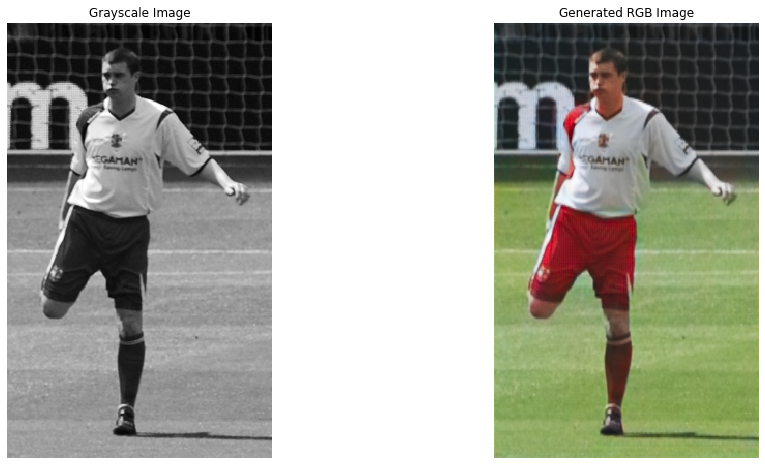

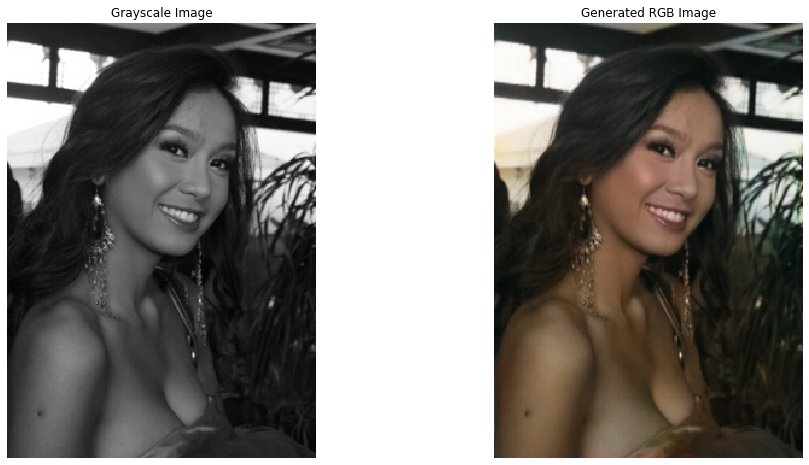

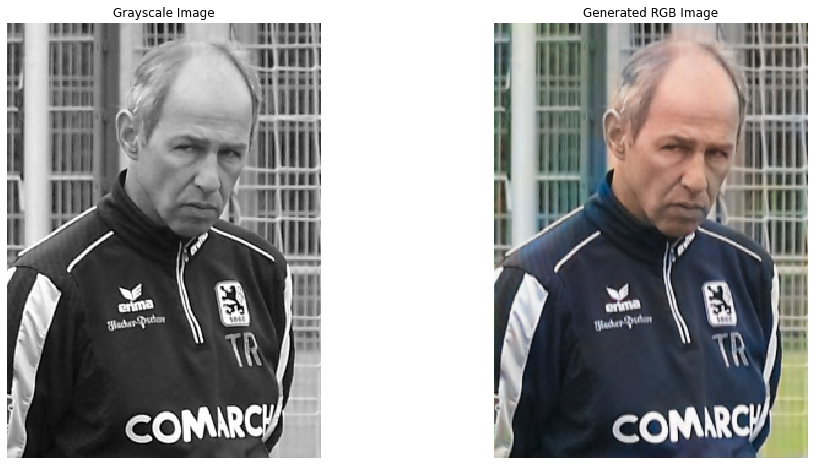

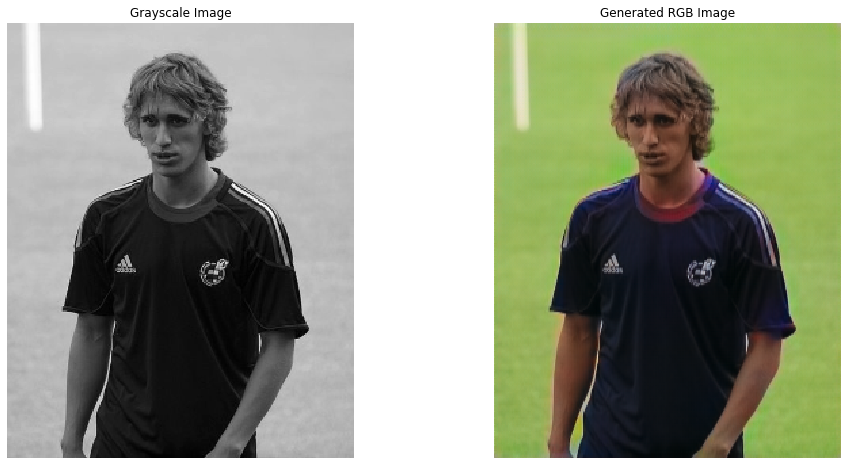

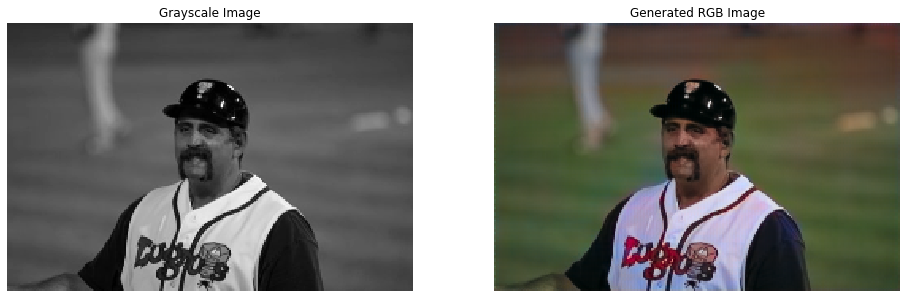

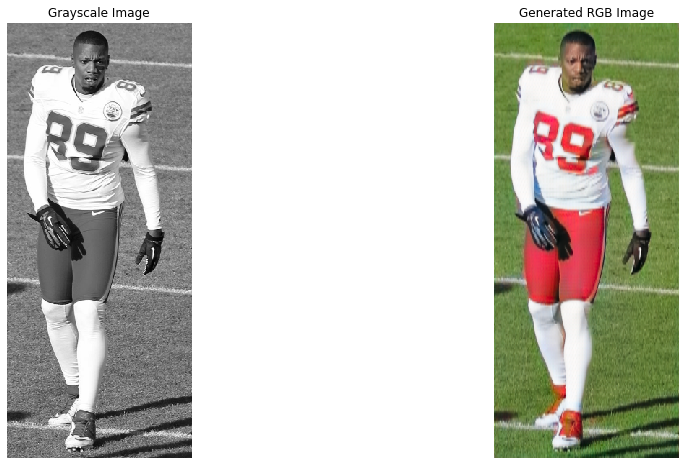

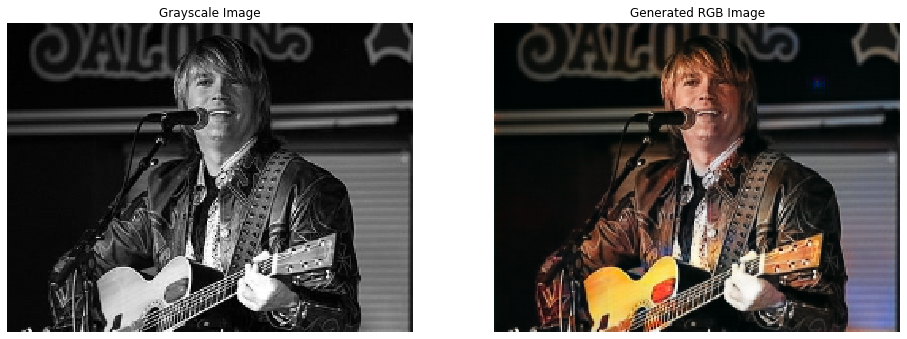

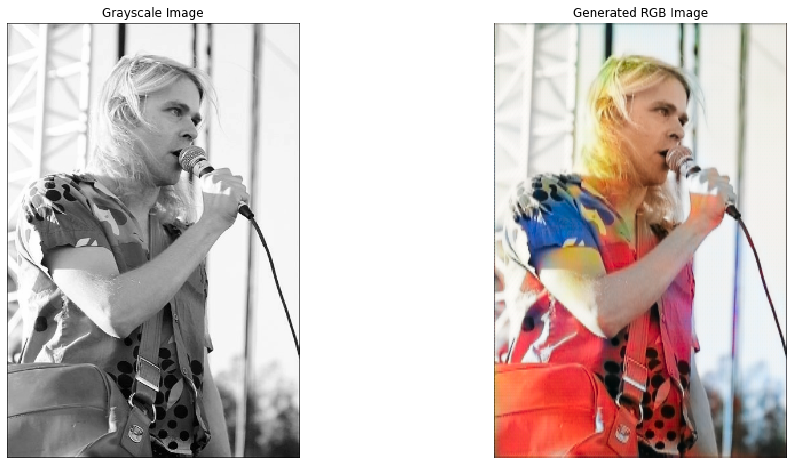

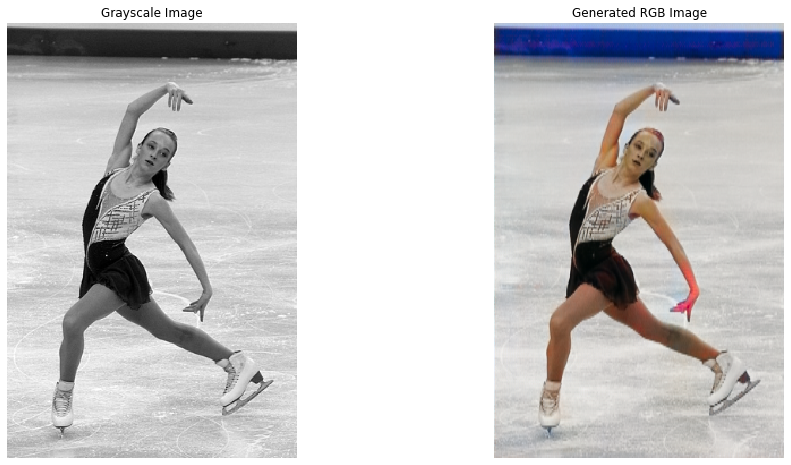

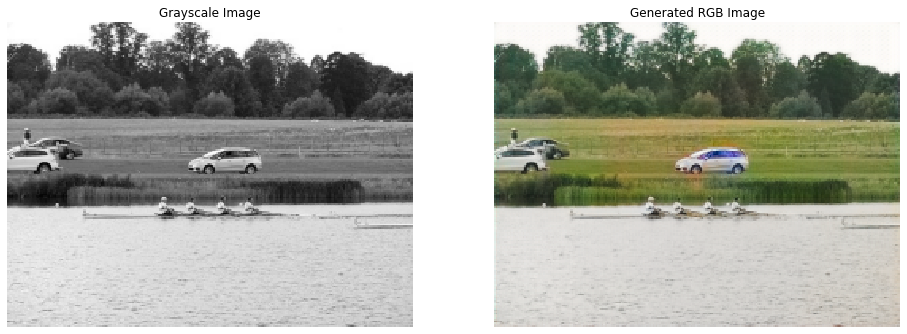

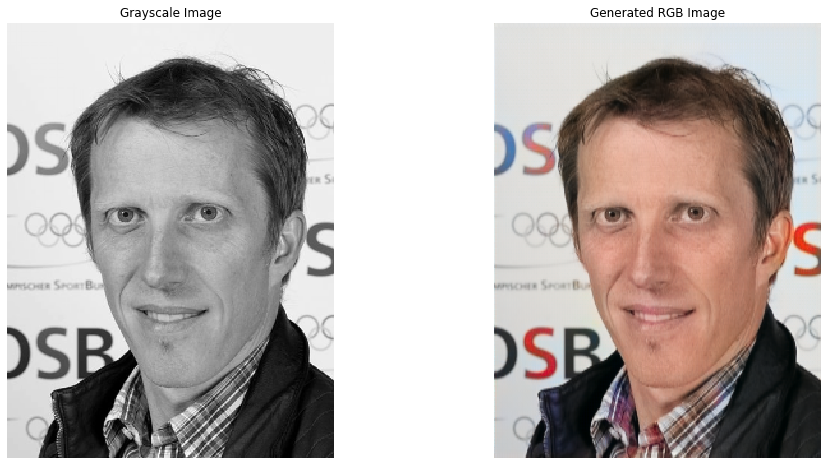

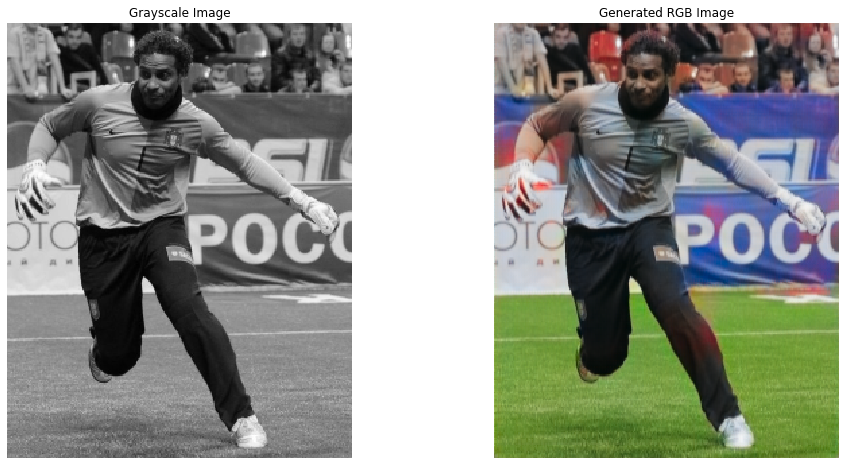

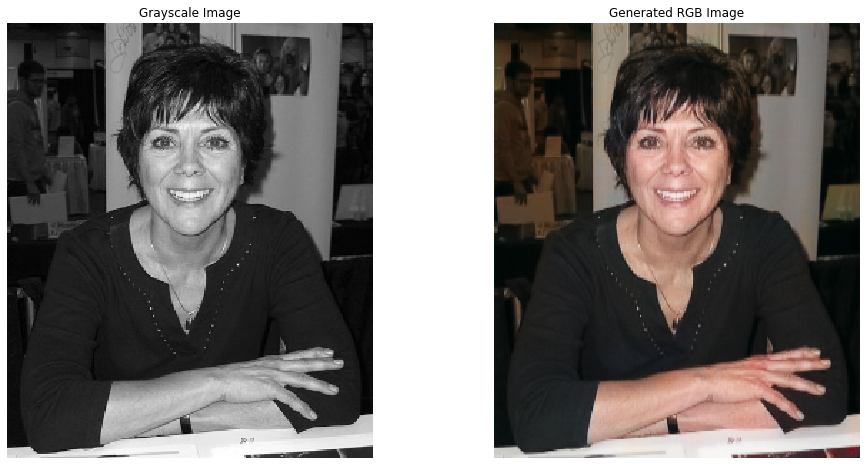

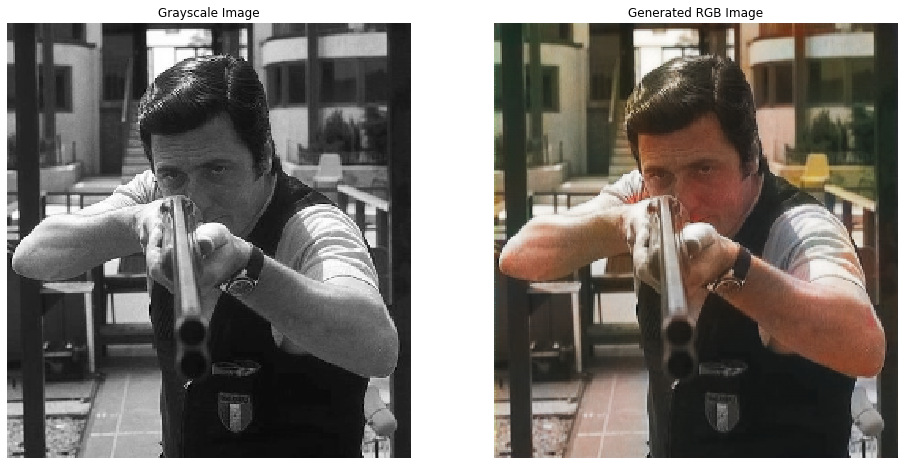

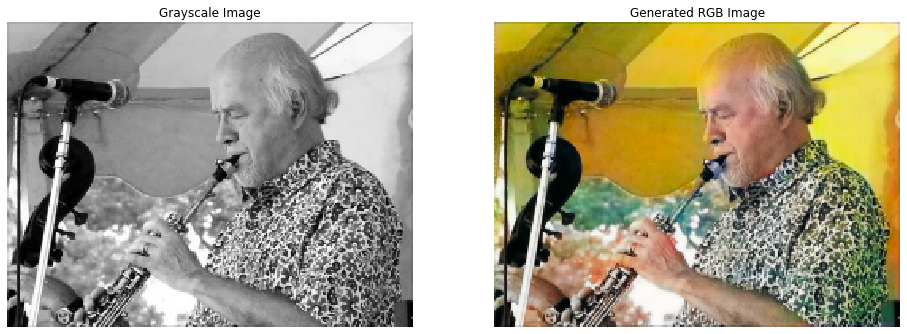

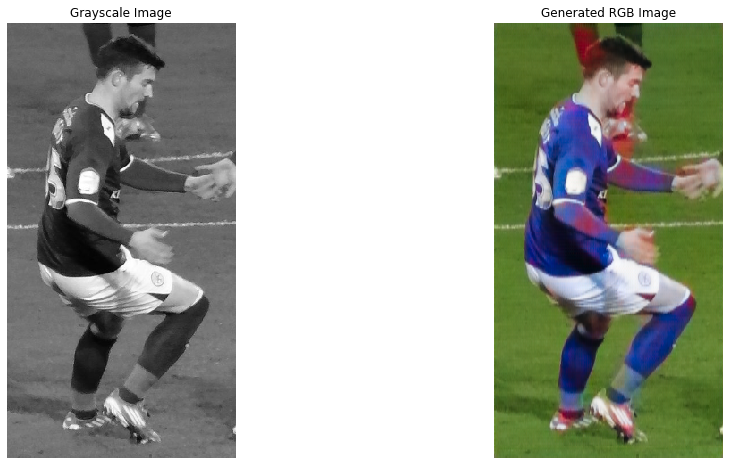

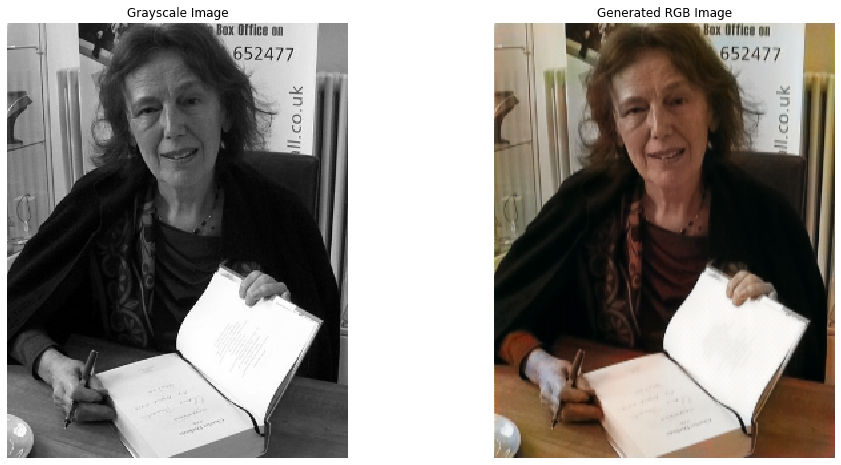

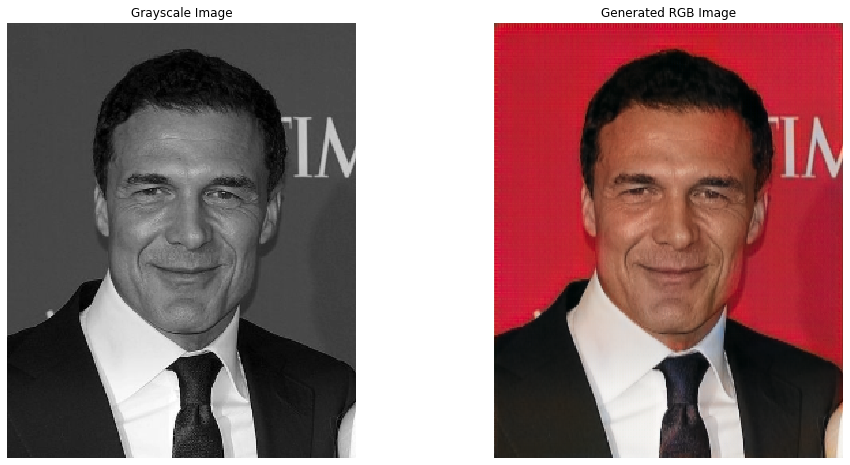

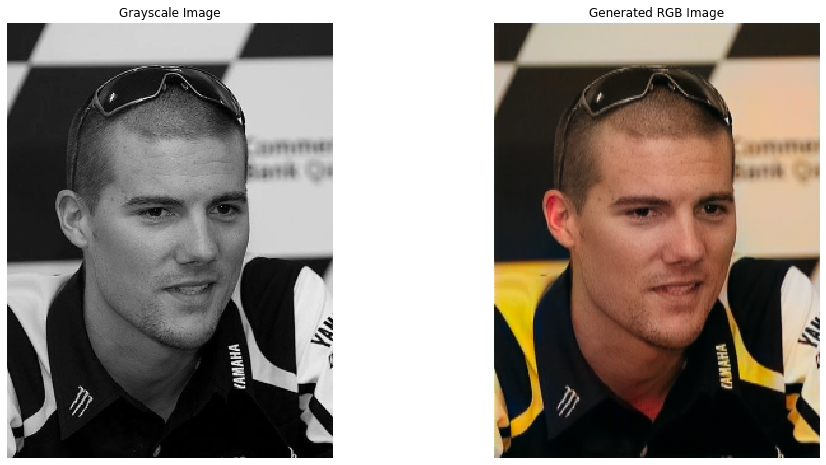

In [4]:
image_list = sorted(glob('../test_images/*'))
for i, image_path in tqdm(enumerate(image_list)):
    image = imread(image_path, as_gray=True)
    colored_image, resized_image = colorizer(image)
    display_images(resized_image, colored_image, i)
    save_images(resized_image, colored_image, path='demo_outputs/'+str(i))